# Environmental Management

**Environment Name:** Linear_Regression    
**Project Directory Name:** linear_regression_prj
<div style="text-align: justify">
<strong>Original Imported Libraries and Python:</strong> python=3.11.9 pandas=2.2.2 numpy=2.0.0 matplotlib=3.8.4 seaborn=0.13.2 statsmodels=0.14.2 scipy=1.13.1 plotly=5.22.0 scikit-learn=1.5.0
</div>

Check the environment jupyter is running every time the notebook is opened:

In [1]:
import sys
sys.executable

'C:\\Users\\Adespotos\\anaconda3\\envs\\Linear_Regression\\python.exe'

# Import Basic Libraries and Read the Data

In [2]:
import numpy as np  # For numerical operations and arrays.	
import pandas as pd  # For data manipulation and analysis.	
import matplotlib.pyplot as plt  # For basic plotting.	
import seaborn as sns  # For enhanced plotting.	
import plotly.express as px  # For interactive plotting.	
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating vif and check for features multicolinearity.
from sklearn.preprocessing import StandardScaler  # For creating scaler instances for standardization purposes.
from sklearn.model_selection import train_test_split  # For splitting the data into sets avoiding overfitting.
from sklearn.linear_model import LinearRegression  # For creating LinearRegression instances.

sns.set()  # For overriding default matplotlib styles with those of seaborn.	

In [3]:
# Read the csv file in a Data Frame:
raw = pd.read_csv('1.04.+Real-life+example.csv')
raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


<div style="text-align: justify">
This data set concerns used cars. The most interesting variable, or our target, is the price of these cars. Consequently, all the other columns may be potential features that could influence the price and may provide explanatory power on price levels.
</div>

# Data Cleaning

## Drop Nulls and Unecessary Columns

In [4]:
raw.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173.0,NaN,NaN,NaN,19418.746935,25584.24262,600.0,6999.0,11500.0,21700.0,300000.0
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345.0,NaN,NaN,NaN,161.237284,105.705797,0.0,86.0,155.0,230.0,980.0
EngineV,4195.0,NaN,NaN,NaN,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345.0,NaN,NaN,NaN,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.0
Model,4345,312,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Define a function showing information of nulls in the data set:
def create_table_of_nulls(rawdata):
    null_counts = rawdata.isnull().sum()  # Sums only the "True" values (the nulls).
    columns_with_nulls = null_counts[null_counts > 0].to_frame().reset_index()  # Keep the columns with nulls and turn to a df.
    columns_with_nulls.columns = ['Columns with Nulls', 'Null Count']  # Name the columns with nulls.
    columns_with_nulls['Null Percent %'] = (columns_with_nulls['Null Count'] / raw.shape[0]) * 100   # Create the percent of nulls column.
    print(columns_with_nulls)

In [6]:
create_table_of_nulls(rawdata=raw)

  Columns with Nulls  Null Count  Null Percent %
0              Price         172        3.958573
1            EngineV         150        3.452244


Since the observations are less than 5% we 'll remove them.

In [7]:
# Create a new df dropping the null observations of the raw data:
raw_drop_obs = raw.dropna(axis=0)

"Registration" column has only two unique values from which the value "yes" concerns almost the 91% of the dataset. We 'll drop the whole column as it doesn't probably adds explanatory power.

In [8]:
# Drop the "Registration" column:
raw_drop_reg = raw_drop_obs.drop(columns='Registration', axis=1)

## Price Column Outliers Solution

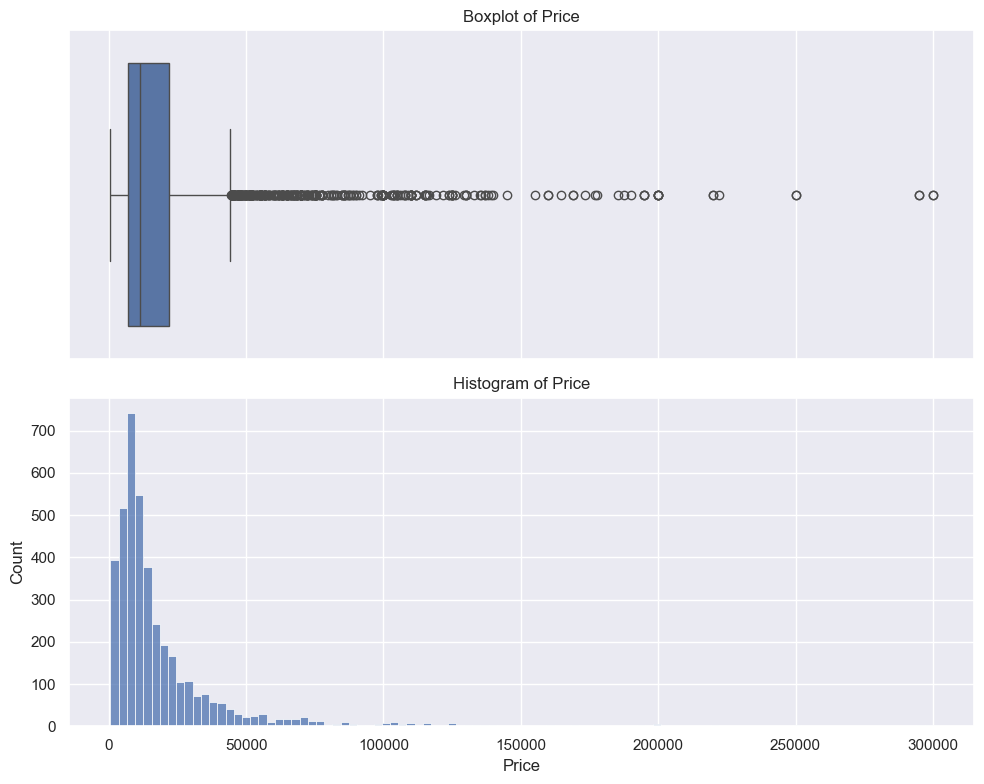

In [9]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_drop_reg, x='Price', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_drop_reg['Price'], ax=hist, bins=100)

# Set the title of the images:
box.set(title='Boxplot of Price')
hist.set(title='Histogram of Price')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

<div style="text-align: justify">
There is a large number of outliers which are very close to the upper whisker. It may not be appropriate to drop all outliers. However, there are some outliers which are very far from the others. To simplify the process, let's drop the top 1% of price observations and check what happens.
</div>

In [10]:
# Calculates the value of 99th quantile:
top_1percent_outliers = raw_drop_reg["Price"].quantile(0.99)

# Keep all values smaller than the value of 99th quantile:
raw_price_outl_removed = raw_drop_reg[raw_drop_reg['Price'] < top_1percent_outliers]

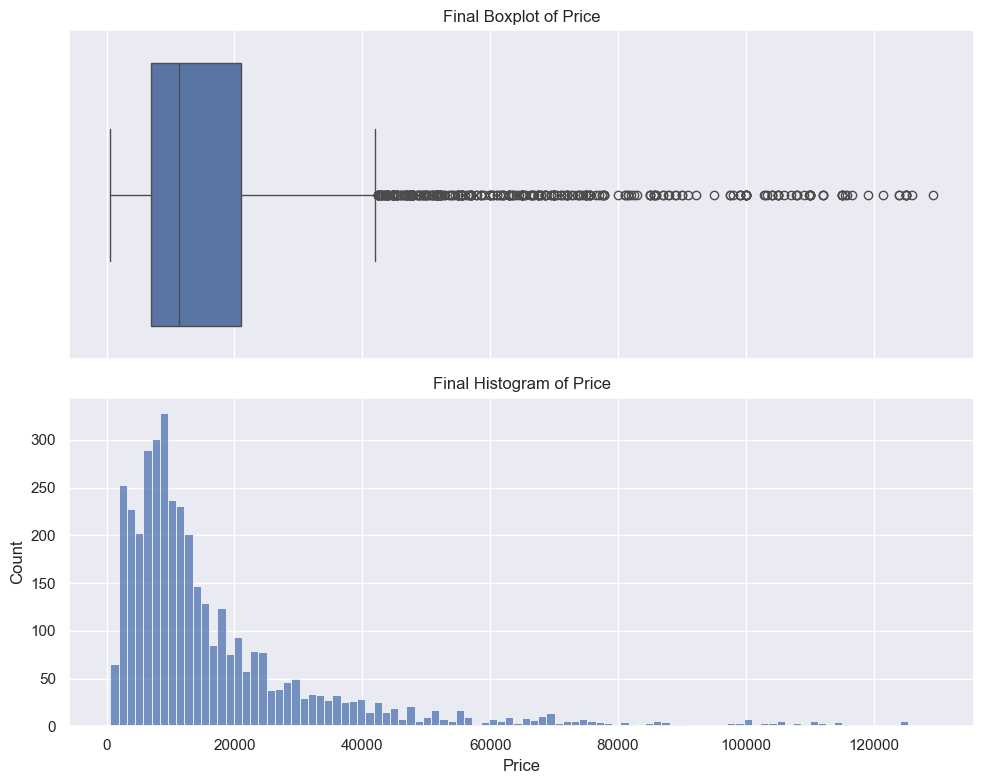

In [11]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_price_outl_removed, x='Price', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_price_outl_removed['Price'], ax=hist, bins=100)

# Set the title of the images:
box.set(title='Final Boxplot of Price')
hist.set(title='Final Histogram of Price')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

Dropping only the top 1% of price observations we managed to drop the max price from 300K to approximately 129K, i.e., approximately 57%!  

## Mileage Column Outlier Solution

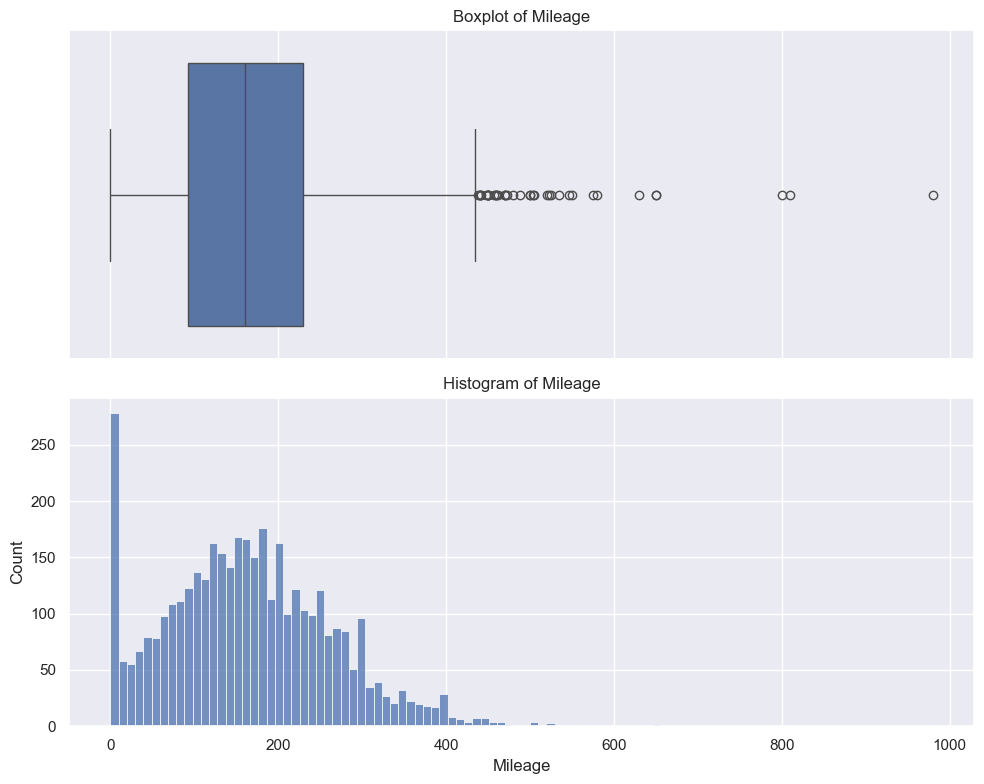

In [12]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_price_outl_removed, x='Mileage', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_price_outl_removed['Mileage'], ax=hist, bins=100)

# Set the title of the images:
box.set(title='Boxplot of Mileage')
hist.set(title='Histogram of Mileage')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

Let's drop the top 1% of mileage observations and see what happens.

In [13]:
# Calculates the value of 99th quantile:
top_1percent_outliers = raw_price_outl_removed['Mileage'].quantile(0.99)

# Keep all values smaller than the value of 99th quantile:
raw_mileage_outl_removed = raw_price_outl_removed[raw_price_outl_removed['Mileage'] < top_1percent_outliers]

# Rearrange the index:
raw_mileage_outl_removed = raw_mileage_outl_removed.reset_index(drop=True)

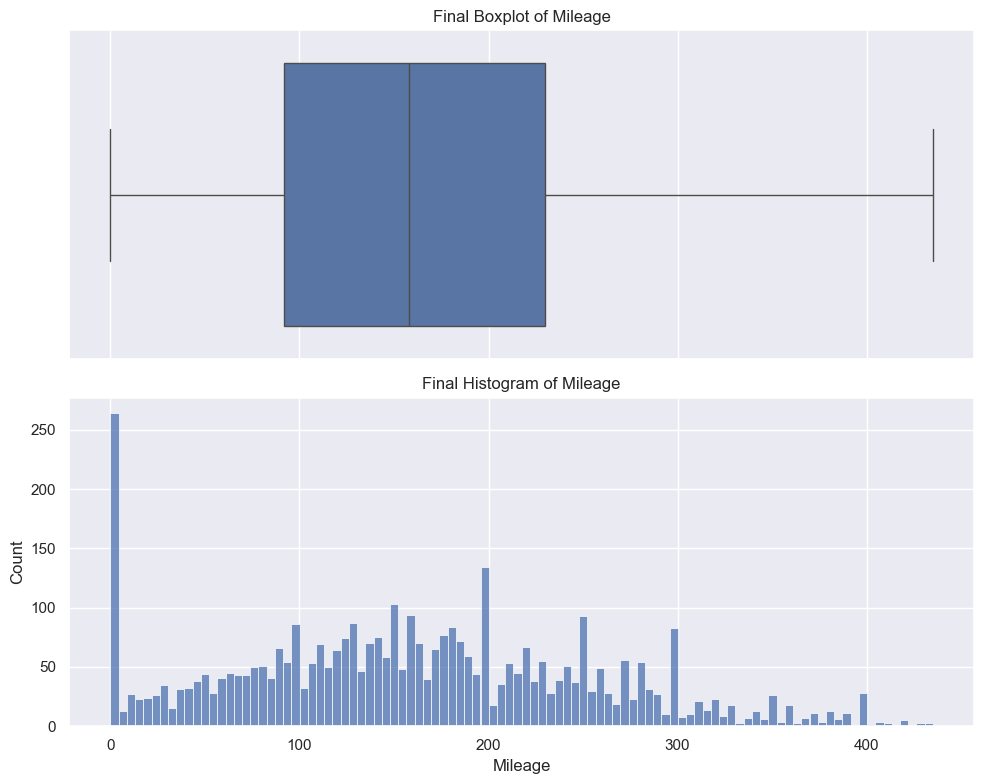

In [14]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_mileage_outl_removed, x='Mileage', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_mileage_outl_removed['Mileage'], ax=hist, bins=100)

# Set the title of the images:
box.set(title='Final Boxplot of Mileage')
hist.set(title='Final Histogram of Mileage')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

Dropping only the top 1% of milage outliers reduced its max value from 980 to 435, i.e., 55.61%!

## Engine Volume Column Outlier Solution

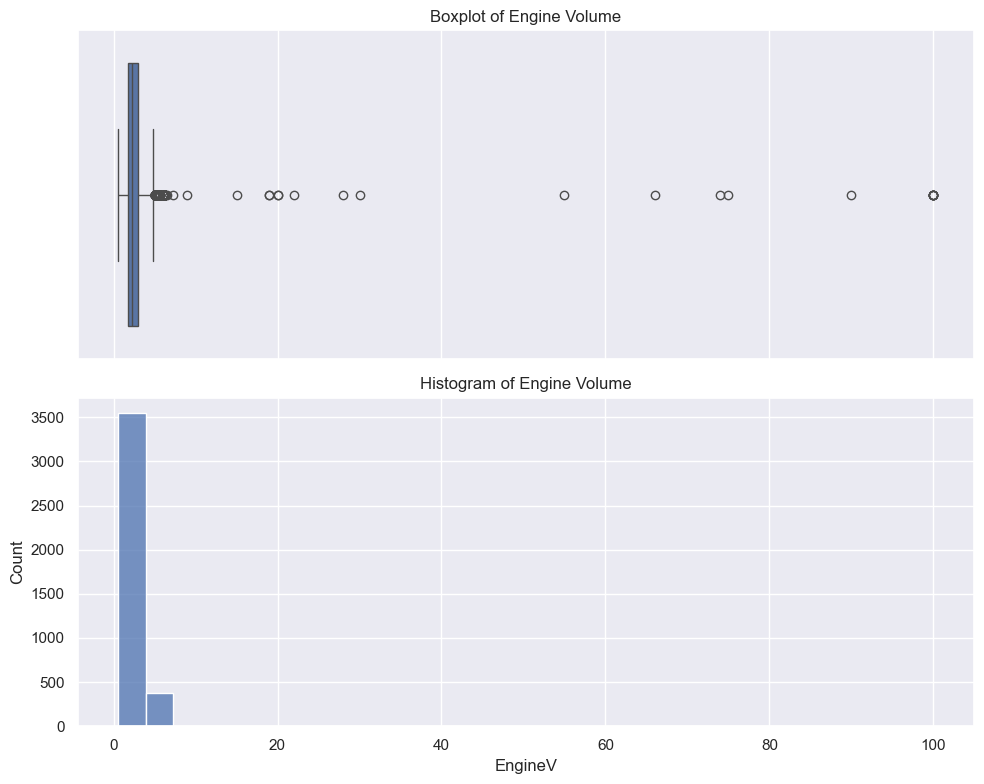

In [15]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_mileage_outl_removed, x='EngineV', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_mileage_outl_removed['EngineV'], ax=hist, bins=30)

# Set the title of the images:
box.set(title='Boxplot of Engine Volume')
hist.set(title='Histogram of Engine Volume')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

<div style="text-align: justify">
The most commercial cars engine volume fall in range of 1-3 liters. We can expand this range to 0.6 to 8 liters because Bugatti Veyron Super Sport features an 8 liter engine. Let's just for curiosity manually check to see the cars with the larger engine volumes keeping in mind that the most correct range for engine volume might be 0.6 to 6.3 or maybe 6.5. The rest of the values are wrong imports.  
</div>

In [ ]:
# Display the 30 largest engine volume values:
raw_mileage_outl_removed['EngineV'].sort_values(ascending=False).to_frame().head(30)

<div style="text-align: justify">
From the df above, all values which are larger than 9 liters can be considered wrong. It can be seen that there are a lot of entries with 6.3 liters of volume. Since, this entry is lied in the reasonable range it is possibly correct. However, there is only one value of 6.5 liters, although it is in range and two other values (7.2 and 9). Let's isolate this indexes here to check them: 3762: 6.5, 1506: 7.2, 2974: 9. 
</div>

In [ ]:
# Check the observations lie in the upper range limit:
print("6.5 Liters Observation:", raw_mileage_outl_removed.iloc[3762], "7.2 Liters Observation:", raw_mileage_outl_removed.iloc[1506], "9 Liters Observation:", raw_mileage_outl_removed.iloc[2974],)

<div style="text-align: justify">
The observation 3762 is a Mercedes-Benz S65 AMG (2008) which volume is given to be at 6 liters which is very close to 6.5 liters of the data table. The observation 1506 is a Toyota Corolla (2011) with an engine volume of 1.8 liters. This is wrong for sure. Finally, the observation 2974 is a Volkswagen Passat B6 (2010) which is impossible to has a 9 liter engine. From this mini research, it is concluded that all observations above and equal to 6.5 liters should be dropped. In addition, some observations with 6.3 liters were checked and seemed to be ok ensuring the conclusion we ended up with.
</div>

In [18]:
# Keep all values which are smaller than the value of 6.5 liters:
raw_enginev_removed = raw_mileage_outl_removed[raw_mileage_outl_removed['EngineV'] < 6.5]

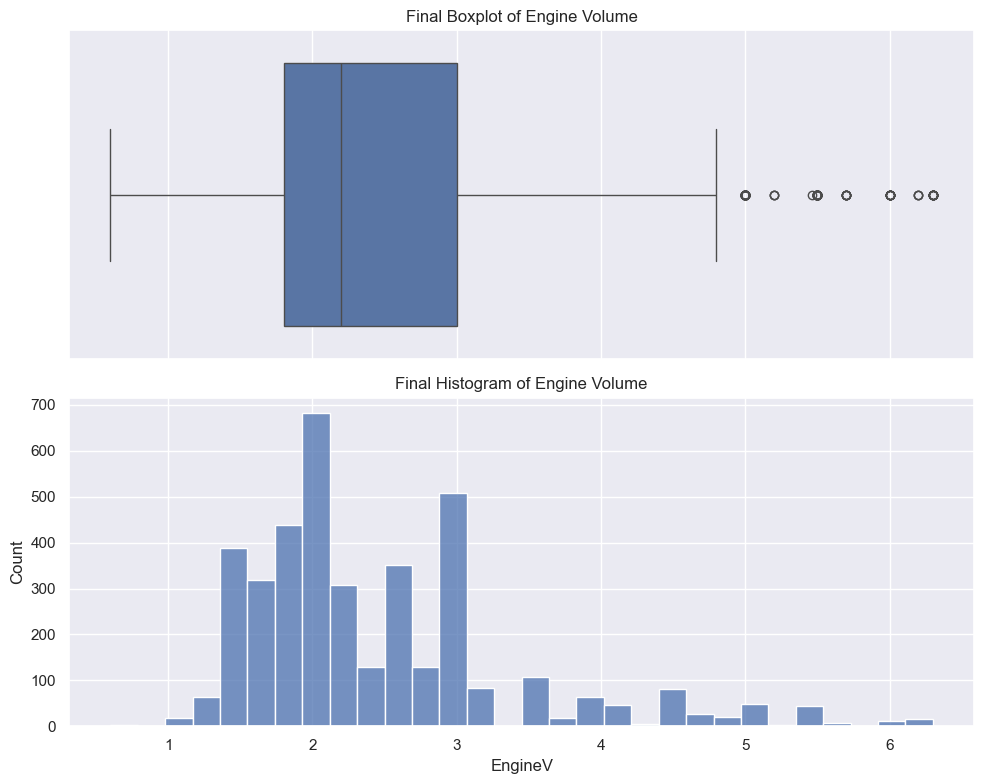

In [19]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_enginev_removed, x='EngineV', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_enginev_removed['EngineV'], ax=hist, bins=30)

# Set the title of the images:
box.set(title='Final Boxplot of Engine Volume')
hist.set(title='Final Histogram of Engine Volume')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

## Year Column Outlier Solution

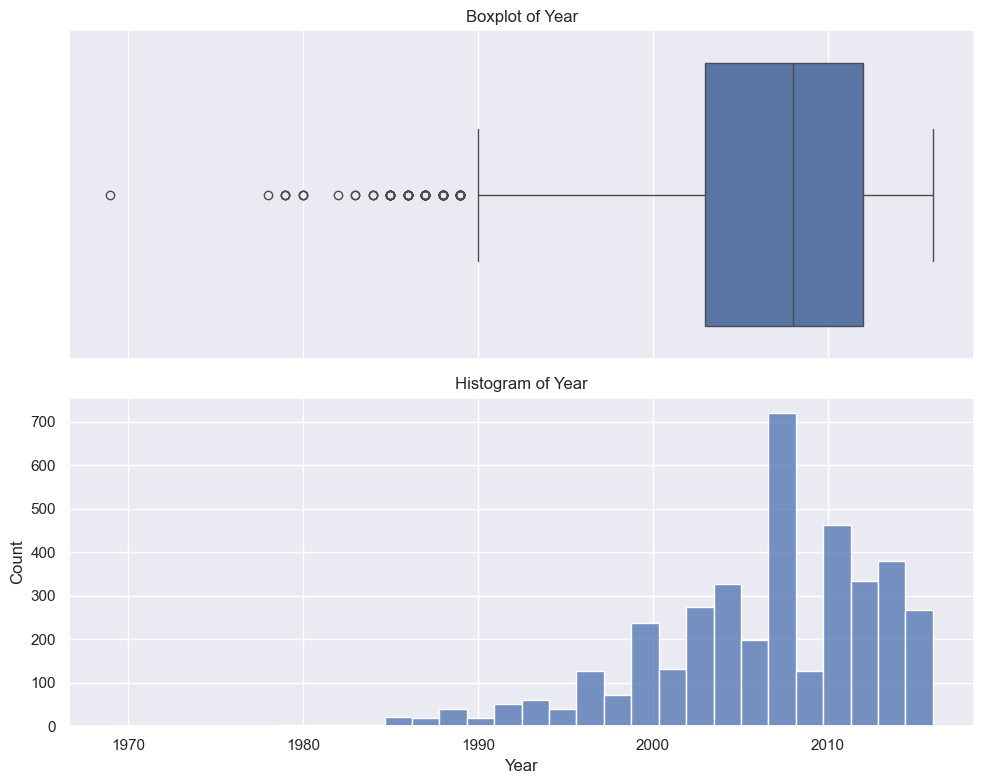

In [20]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_enginev_removed, x='Year', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_enginev_removed['Year'], ax=hist, bins=30)

# Set the title of the images:
box.set(title='Boxplot of Year')
hist.set(title='Histogram of Year')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

In [21]:
# Calculates the value of 99th quantile:
bottom_1percent_outliers = raw_enginev_removed['Year'].quantile(0.01)

# Keep all values smaller than the value of 99th quantile:
raw_year_outl_removed = raw_enginev_removed[raw_enginev_removed['Year'] > bottom_1percent_outliers]

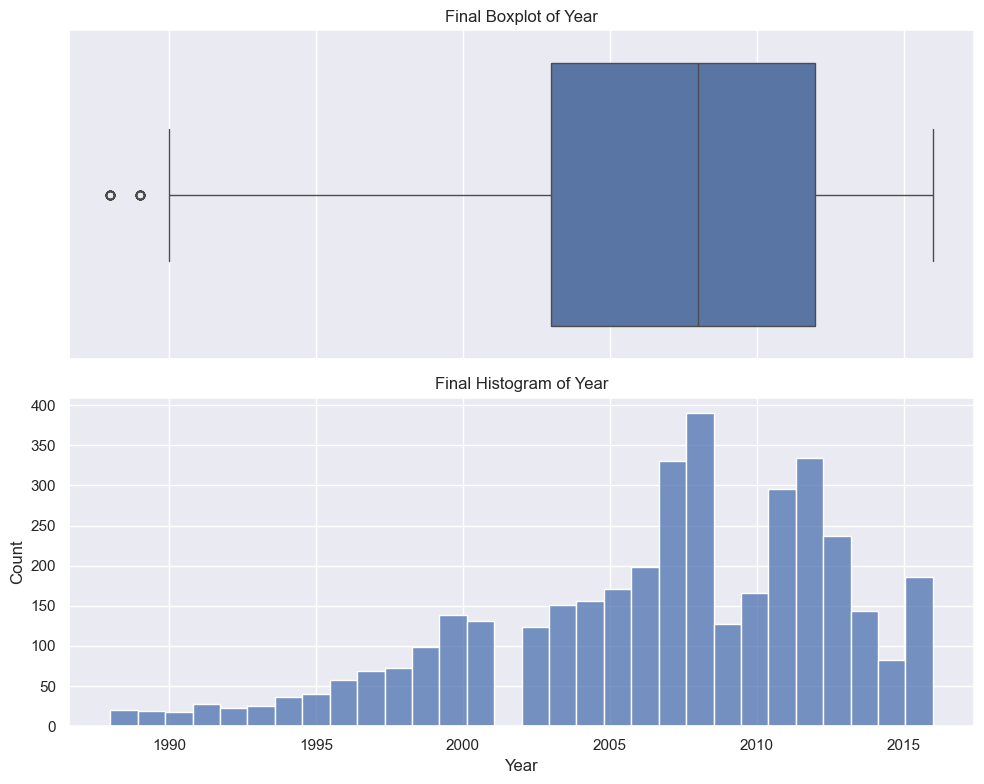

In [22]:
# Create the double image figure with two rows and one column:
fig, (box, hist) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Create the first image (boxplot):
sns.boxplot(data=raw_year_outl_removed, x='Year', ax=box)

# Create the second image (histplot):
sns.histplot(data=raw_year_outl_removed['Year'], ax=hist, bins=30)

# Set the title of the images:
box.set(title='Final Boxplot of Year')
hist.set(title='Final Histogram of Year')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

Dropping the bottom 1% of year outliers, we managed to reduce the year range by 40.42%!

We dropped the 11% of observations in total. However, we managed to get rid of all null values, the outliers and the wrong values. 

In [23]:
# Create the final, cleaned df:
df = raw_year_outl_removed.reset_index(drop=True)

## Save the Cleaned Data Frame Including all its Columns

In [24]:
file_path = 'cleaned_df.csv'
df.to_csv(file_path, index=False)

# Check Linear Regression Assumptions

<div style="text-align: justify">
Only the continuous features can influence the assumptions application. The rest of the features, the categorical ones are considered generally safe for the assumptions to be hold and can be exluded. Consequently, there 4 features of interest for these checks: Price, mileage, the year of the model and engine volume whereas the prices is the target variable.
</div>

## Check for Linearity

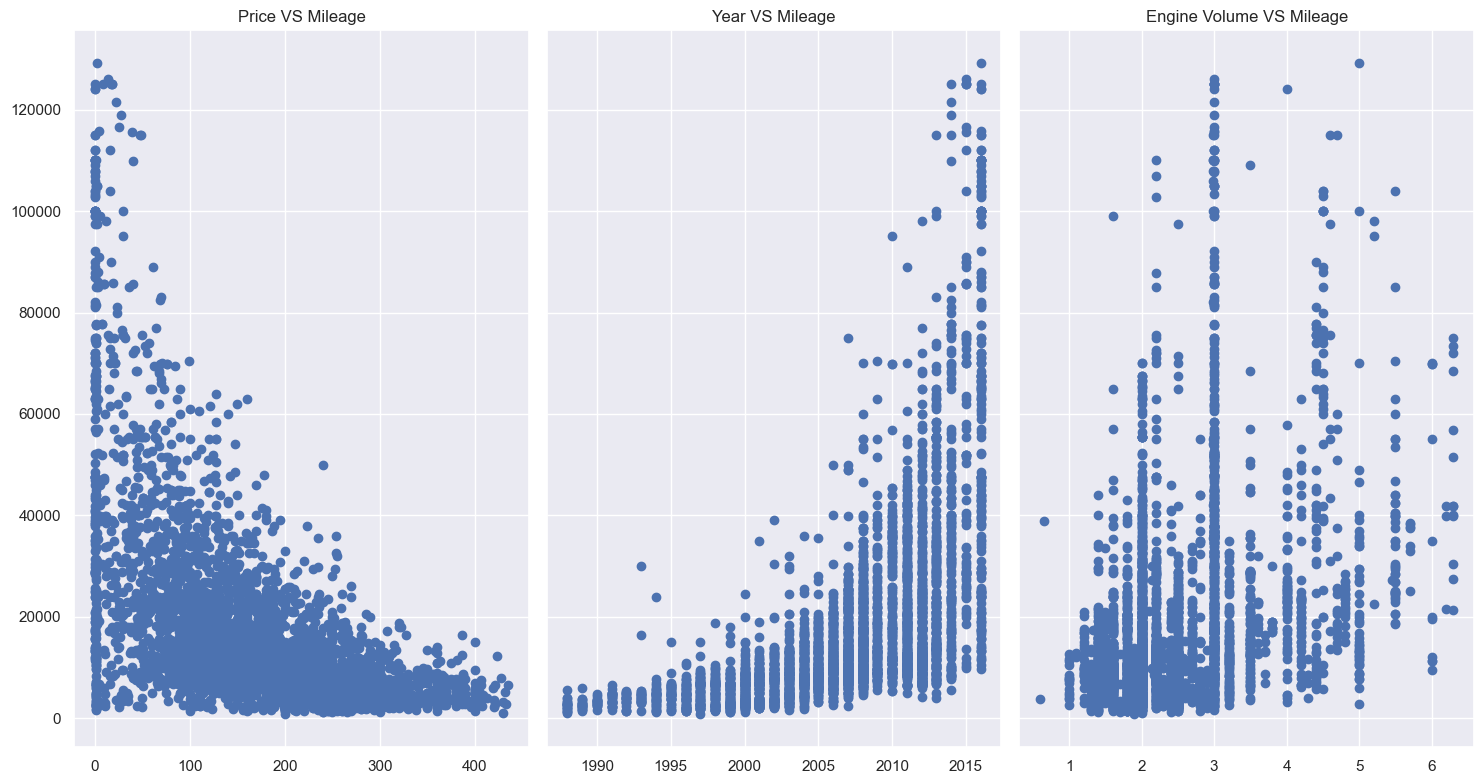

In [25]:
# Create the triple image figure with one row and three columns:
fig, (mileage, year, volume) = plt.subplots(1, 3, sharey=True, figsize=(15, 8))

# Create the first image (mileage) and set its title:
mileage.scatter(df['Mileage'], df['Price'])
mileage.set_title('Price VS Mileage')

# Create the second image (mileage) and set its title:
year.scatter(df['Year'], df['Price'])
year.set_title('Year VS Mileage')

# Create the third image (mileage) and set its title:
volume.scatter(df['EngineV'], df['Price'])
volume.set_title('Engine Volume VS Mileage')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

The data showcases more of an exponential pattern than a linear one. Let's transform the price data and dee the results.

In [26]:
# Transform the price values to logarithmic ones:
df['Price'] = np.log(df['Price'])

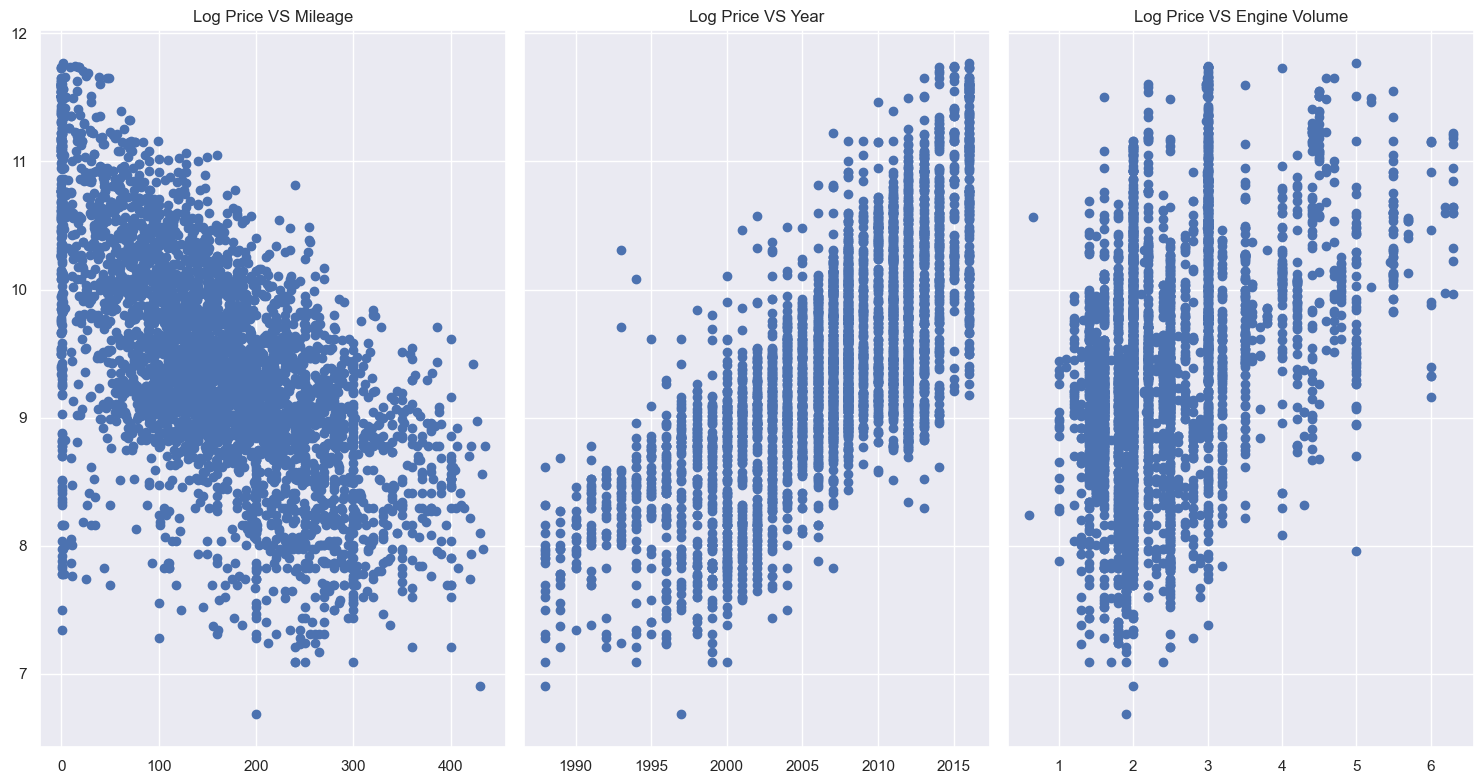

In [27]:
# Create the triple image figure with one row and three columns:
fig, (mileage, year, volume) = plt.subplots(1, 3, sharey=True, figsize=(15, 8))

# Create the first image (mileage) and set its title:
mileage.scatter(df['Mileage'], df['Price'])
mileage.set_title('Log Price VS Mileage')

# Create the second image (mileage) and set its title:
year.scatter(df['Year'], df['Price'])
year.set_title('Log Price VS Year')

# Create the third image (mileage) and set its title:
volume.scatter(df['EngineV'], df['Price'])
volume.set_title('Log Price VS Engine Volume')

# Adjust the layout to prevent overlapping of labels: 
plt.tight_layout();

Linear patterns can be seen in the above data. So the first assumption is solved.

## Check for No-Endogeneity of Regressors

<div style="text-align: justify">
Whatever might affect the error, will be properly examined, as long as all the features are included in the model. We will include all the features discussing about endogeneity after the application of the model and the knowledge of the adjusted R-Squared. We will see what might be done then. So, this assumption holds for now as well. 
</div>

## Check for Normality of Residuals

Since the dataset is big, CLT applies and this assumption holds.

## Check for Zero Mean of the Residuals

Since we won't omit a possible intercept the residuals should result to a zero mean. This assumption holds as well.

## Check for Homoscedasticity

<div style="text-align: justify">
Checking the scatter plots of price VS the continuous variables it can be seen that the transformation of price to a logarithmic one, fixes this issue. The volume of engine VS log price might need a further inspection, however, we will suppose that this assumption holds as well.
</div>

## Check for No-Autocorellation

The residuals won't be showcased a specific pattern if plotted over time since the dataset provided isn't related to time. This assumption holds. 

## Check for Multicolinearity

In [28]:
# Isolate the variables have to be checked for multicolinearity:
cont_vars = df[['Mileage', 'Year', 'EngineV']]

# Create an empty df and a column:
vif = pd.DataFrame()
vif['Features'] = cont_vars.columns

# Calculate the vif values:
vif["VIF"] = [variance_inflation_factor(cont_vars.values, i) for i in range(cont_vars.shape[1])]
vif

,Features,VIF
0,Mileage,3.791584
1,Year,10.354854
2,EngineV,7.662068


Considering that mileage might be corellated with year and since year has the biggest vif value we 'll drop the year column.

In [29]:
# Drop the year column:
df = df.drop(columns='Year', axis=1)

# Create Dummies

We 'll drop the model column simplyfying the process because the brand, the mileage and the engine volume already include information which might be related to the model and won't lead to lost of variablity.

In [30]:
# Drop the model column:
df = df.drop(columns='Model', axis=1)

In [31]:
# Create the dummies:
df_dummies = pd.get_dummies(df, drop_first=True)

# Linear Regression Model

## Define Features and Target

In [32]:
# Define the features:
x = df_dummies.drop(columns='Price', axis=1)

# Define the target:
y = df_dummies['Price']

## Scale the features

In [33]:
# Define the scaler instance and fit it with features:
scaler = StandardScaler()
scaler.fit(x)

# Transform the features to scaled ones:
x_scaled = scaler.transform(x)

## Split the Data Avoiding Overfitting

In [34]:
# Split the data into two parts to avoid overfitting:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)

## Linear Regression Model

In [35]:
# Create the linear regression instance:
model = LinearRegression()

# Fit the instance with the training part of the data:
model.fit(x_train, y_train)

# Create predictions over the train part of the data to see how the model behaves in comparison to the train set: 
y_hat_train = model.predict(x_train)

## Model Results over the Training Set of the Data

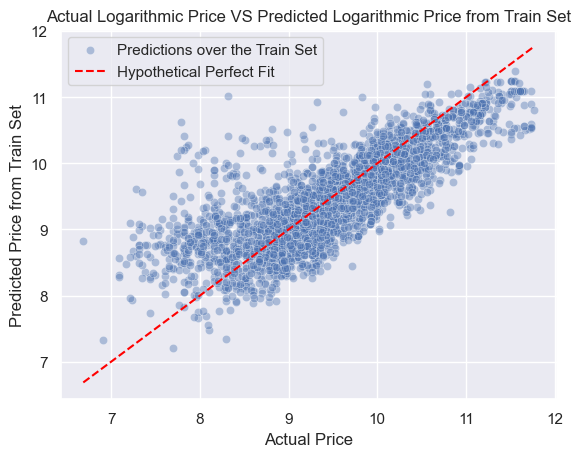

In [36]:
# Create a scatter plot of actual price versus predicted price:
sns.scatterplot(x=y_train, y=y_hat_train, alpha=0.4, label='Predictions over the Train Set')

# Set the labels:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price from Train Set')
plt.title('Actual Logarithmic Price VS Predicted Logarithmic Price from Train Set')

# Determine the min and max for the axes to plot the 45-degree line
min_val = min(min(y_train), min(y_hat_train))
max_val = max(max(y_train), max(y_hat_train))

# Plot the 45-degree line (perfect prediction line)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Hypothetical Perfect Fit')

plt.legend();

The above scatter plot indicates that the model works. There is a pattern in predicted data which follows the hypothetical perfect fitting.

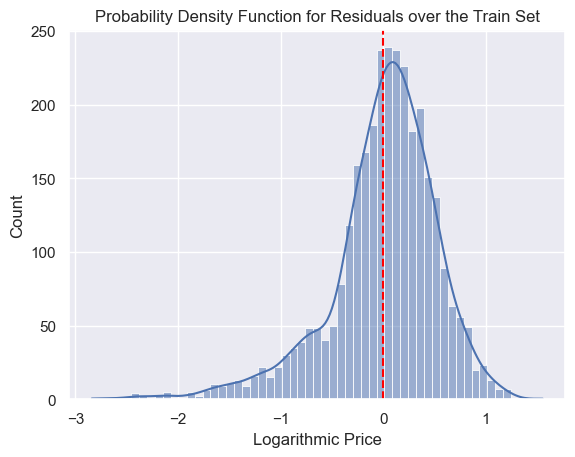

In [37]:
# Create a histplot of the residuals:
sns.histplot(y_train - y_hat_train, kde=True)

# Create a helpline originated from zero:
plt.axvline(x=0, color='red', linestyle='--')

# Set the title and the x label:
plt.xlabel('Logarithmic Price')
plt.title('Probability Density Function for Residuals over the Train Set');

<div style="text-align: justify">
The actual logarithmic price over the predicted logarithmic price implied that there might be a possibility the model can be further improved. The probability density function of the logarithmic price residuals confirms this. To be more specific, it can be seen that there are some predictions far above the actual price, whereas the majority of the predictions have underestimated the price (the red line is slightly at the left affecting the normal distribution and meaning there are a lot of predicted data at its right).
</div>

## Model Parameters

In [38]:
train_feature_summary = pd.DataFrame(x.columns.values, columns=['Features'])
train_feature_summary['Weights'] = model.coef_
train_feature_summary

,Features,Weights
0,Mileage,-0.515335
1,EngineV,0.219670
2,Brand_BMW,0.021932
3,Brand_Mercedes-Benz,0.056136
4,Brand_Mitsubishi,-0.113895
5,Brand_Renault,-0.130058
6,Brand_Toyota,-0.021693
7,Brand_Volkswagen,-0.041895
8,Body_hatch,-0.169471
9,Body_other,-0.100725


In [39]:
r2 = model.score(x_train, y_train)
r2_adj = 1 - (1 - r2)* (x.shape[0] - 1) / (x.shape[0] - x.shape[1] -1)
param_summary = pd.DataFrame([
    {'Parameters': 'Intercept', 'Values': model.intercept_},
    {'Parameters': 'R-Squared', 'Values': r2},
    {'Parameters': ' Adj R-Squared', 'Values': r2_adj}])
param_summary

,Parameters,Values
0,Intercept,9.416736
1,R-Squared,0.632793
2,Adj R-Squared,0.631267


## Predictions of the Model

In [40]:
y_hat_test = model.predict(x_test)

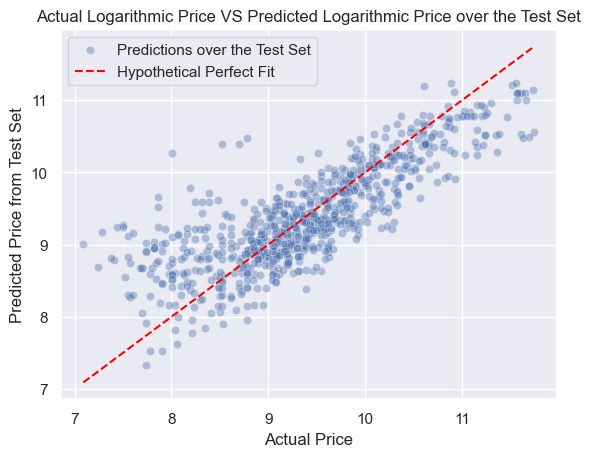

In [41]:
# Create a scatter plot of actual price versus predicted price:
sns.scatterplot(x=y_test, y=y_hat_test, alpha=0.4, label='Predictions over the Test Set')

# Set the labels:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price from Test Set')
plt.title('Actual Logarithmic Price VS Predicted Logarithmic Price over the Test Set')

# Determine the min and max for the axes to plot the 45-degree line
min_val = min(min(y_test), min(y_hat_test))
max_val = max(max(y_test), max(y_hat_test))

# Plot the 45-degree line (perfect prediction line)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Hypothetical Perfect Fit')

plt.legend();

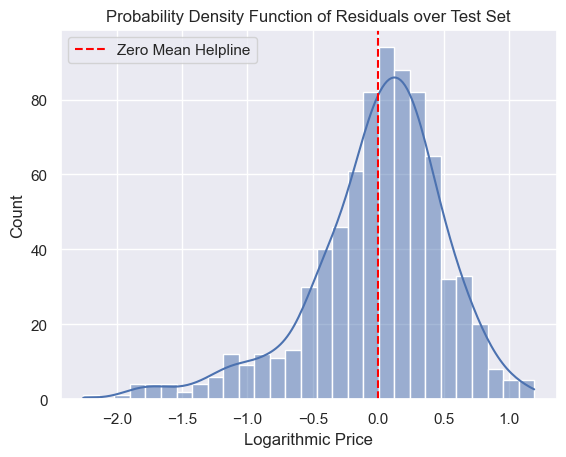

In [42]:
# Create a histplot of the residuals:
sns.histplot(y_test - y_hat_test, kde=True)

# Create a helpline originated from zero:
plt.axvline(x=0, color='red', linestyle='--', label='Zero Mean Helpline')

# Set title, axis labels and legend:
plt.xlabel('Logarithmic Price')
plt.title('Probability Density Function of Residuals over Test Set');
plt.legend();

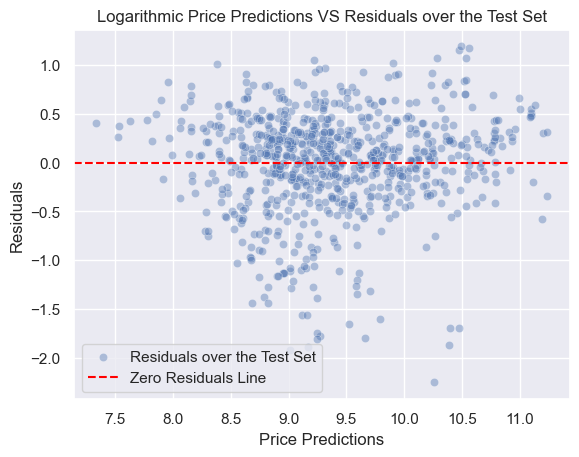

In [43]:
# Create a scatter plot of predicted price versus residuals over the test set:
sns.scatterplot(x=y_hat_test, y=y_test - y_hat_test, alpha=0.4, label='Residuals over the Test Set')

# Add a horizontal line at y=0 to indicate the zero residuals line:
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals Line')

# Set title, axis labels and legend:
plt.xlabel('Price Predictions')
plt.ylabel('Residuals')
plt.title('Logarithmic Price Predictions VS Residuals over the Test Set');
plt.legend();

In [44]:
# Turn the logarithmic price into a normal one:
predictions = np.exp(y_hat_test)
actual_price = np.exp(y_test)

In [45]:
# Create a new df adding the predictions to a columns:
df_comparison = pd.DataFrame(predictions, columns=['Predictions'])

# Fix the index before adding the actual prices to the same df:
actual_price = actual_price.reset_index(drop=True)

# Add the actual prices next to predicted prices:
df_comparison['Actual Prices'] = actual_price

# Add residuals column:
df_comparison['Residuals'] = df_comparison['Actual Prices'] - df_comparison['Predictions']

# Add percentage of difference column:
df_comparison['Difference %'] = np.abs(round((df_comparison['Residuals'] / df_comparison['Actual Prices']) * 100, 2))

In [ ]:
# Make pandas to display all rows:
pd.options.display.max_rows = 999

# Sort values by difference in actual vs predicted price:
df_comparison.sort_values(by='Difference %', ascending=False)

# Conclusions

<div style="text-align: justify">
The model isn't bad, but isn't good neither. Additionally, the column 'Difference %' might misleads information. It doesn't punish the cases where the model underestimates price with the same effect it punishes the cases which the model overestimates price. I am also quetsioning the absolute value in this column which hides even more information. There are a lot of things can be done here:  
    
1) The data frame with the comparisons (df_comparison) might need further improvements or probably the creation of a function which will display more metrics than the 'Difference %'.
2) Delving into the model and understand 100% its results.
3) Apply improvements (feature selection, different data transformations etc) using the same model (Linear Regression) and see what happens, trying to better understand the results.
4) Getting in more advanced projects might require the creation of some appropriate functions in order to copy them and use them repeatidly and quickly in my future projects.

Since this is a lot of work, it may be wiser to be done at the future. This notebook is already big enough and includes so much information. In addition, proceeding to other parts of my study might reveal some of the knowledge I lack at this moment and directly help me solve some of my ambiguities here. 
</div>